<a href="https://colab.research.google.com/github/Sudesha228/Sudesha228.github.io/blob/master/iet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
customer_data = pd.read_csv(r'ML_TASK_CSV.csv')

In [4]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset = customer_data.drop(['CustomerId', 'Surname'], axis=1)


In [6]:
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)


In [8]:
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [9]:
dataset = pd.concat([dataset,Geography,Gender], axis=1)


In [10]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.78      0.51      0.61       621

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.77      3000
weighted avg       0.86      0.87      0.86      3000

0.868


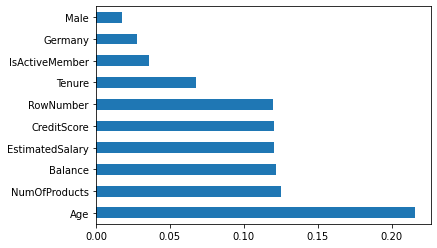

In [15]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [16]:
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]